In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import PFSMG as pfsmg
import functions as func
import pickle

In [2]:
SEED_arr = [112233455, 666, 889099, 558866, 559966, 99998866, 99888866, 9966668, 99677808, 7542229,  \
            11234455, 6600451, 8852099, 110036, 277066, 277066, 900186, 9820816, 908253, 1089532]
num_data = range(1000, 6001, 500)

# Handle Accuracy vs Disparate Impact In binary case

Deal with the case of binary-valued sensitive attribute--Gender using Adult income dataset.

**Dataset:**
- The full adult income dataset is available in [UCI Machine Learning Repository]( https://archive.ics.uci.edu/ml/datasets/adult).
- Data preprocessing details are described in Appendix D of our [paper](https://arxiv.org/pdf/2008.01132.pdf).
- For convenience, we provided dataset in the txt file `data/Adult_income_gender_reduced.txt`.
- Note that the prediction label is $\{+1, -1\}$ in our function formulation and implementation. 

**Bi-objective problem:** Decision variables are $x = (c, b)$
- First objective: minimize regularized logistic regression. 
    - $\min~ f_1(c, b) \;=\; \tfrac{1}{N}\sum_{j=1}^N \text{log}(1+\text{exp}(-y_j(c^\top z_j + b)))$
- Second objective: minimize disparate impact (approximated by covariance metrics). 
    - $\min~ f_2^\text{DI}(c, b) \;=\; \left(\frac{1}{N}\sum_{j=1}^N (a_j - \bar{a})(c^\top z_j + b)\right)^2$
    
Please refer to our paper **Accuracy and Fairness Trade-offs in Machine Learning: AStochastic Multi-Objective Approach** for more details. 

In [3]:
data_idx = 8
prob = func.Fairness_LogRe_DI_binary('data/Adult_income_gender_reduced.txt', 'Adult_income_gender', 1, \
                                     SEED_arr[data_idx], num_data[data_idx], 'train')
run = pfsmg.Main_SMG(prob)

run.max_len_pareto_front = 1500
run.max_iter = 1000

## key parameters
run.point_per_iteration = 2 
run.num_steps_per_point = 3 
run.stepsize = 2.1 
run.step_scheme = 3 
run.alpha = 1.0/3 
run.discount_iter_interval = 80 
run.batch1_init = 80 
run.batch1_factor = 1.005 
run.batch1_max = 1 
run.batch2_init = 80  
run.batch2_factor = 1.005 
run.batch2_max = 1.0/2  

## other parameters
run.num_starting_pts = 5
run.percent_explore = 0.4 
run.f1_explore_interval = 15 
run.f2_explore_interval = 1000 

run.f1_explore_pt_per_iter = 2 
run.f2_explore_pt_per_iter = 1 
run.f1_num_steps_per_point = 3*run.num_steps_per_point 
run.f2_num_steps_per_point = 2*run.num_steps_per_point 

run.num_max_hole_points = 5 
run.max_hole_explore_pt_per_iter = 2*run.point_per_iteration 
run.max_hole_num_steps_per_point = run.num_steps_per_point 
run.max_hole_only = False 
run.dense_threshold = 0 # 1.0/(800 + self.num_iter/2.0)

#Training data size:  5000
split 1
idx [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53]
sum of sensitive 3386.0


### The following PF-SMG function is designed to iteratively update fronts
- The algorithm may takes more than half hour to terminate
- The algorithm will be terminated either max iteration is reached or max number of non-dominated points is obtained. Reduce `run.max_iter` to reduce running time and increase `run.max_len_pareto_front` to improve Pareto front spread. 

In [4]:
f1_arrays7, f2_arrays7, point_arrays7, total_time_smg = run.main_SMG()

time:  0.13614106178283691
#Pts:  4  #Iter:  3
time:  0.0701298713684082
#Pts:  11  #Iter:  6
time:  0.1400890350341797
#Pts:  13  #Iter:  9
time:  0.14889287948608398
#Pts:  18  #Iter:  12
time:  0.1933128833770752
#Pts:  19  #Iter:  15
time:  0.334000825881958
#Pts:  22  #Iter:  18
time:  0.23937368392944336
#Pts:  30  #Iter:  21
time:  0.2994668483734131
#Pts:  24  #Iter:  24
time:  0.2651982307434082
#Pts:  25  #Iter:  27
time:  0.2675628662109375
#Pts:  35  #Iter:  30
time:  0.58174729347229
#Pts:  42  #Iter:  33
time:  0.3628859519958496
#Pts:  39  #Iter:  36
time:  0.32691121101379395
#Pts:  41  #Iter:  39
time:  0.3523557186126709
#Pts:  36  #Iter:  42
time:  0.31868791580200195
#Pts:  38  #Iter:  45
time:  0.35277795791625977
#Pts:  41  #Iter:  48
time:  0.3518829345703125
#Pts:  44  #Iter:  51
time:  0.36301207542419434
#Pts:  39  #Iter:  54
time:  0.33634519577026367
#Pts:  52  #Iter:  57
time:  0.4114701747894287
#Pts:  43  #Iter:  60
time:  0.3476548194885254
#Pts:  41  #I

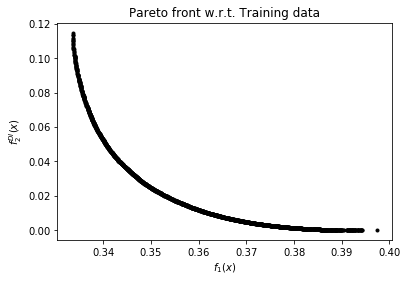

In [6]:
plt.plot(f1_arrays7, f2_arrays7, 'k.')
plt.xlabel('$f_1(x)$')
plt.ylabel('$f_2^{DI}(x)$')
plt.title('Pareto front w.r.t. Training data')
plt.show()

In [ ]:
## Dump resulting Pareto front into pickle if you want
logfile = "pickle/gender_vs_loss/gender_seed%s_num_data%s.pickle"\
          %(SEED_arr[data_idx], num_data[data_idx])
with open(logfile, 'wb') as handle:
    pickle.dump([prob.data_name, total_time_smg, run.num_grad_eval_f1, \
             run.num_grad_eval_f2, run.num_iter, f1_arrays7, \
             f2_arrays7, point_arrays7], handle)

In [4]:
## Load resulting Pareto front from previous pickle
logfile = "pickle/gender_vs_loss/gender_seed%s_num_data%s_remove_noise.pickle"\
          %(SEED_arr[data_idx], num_data[data_idx])
with open(logfile, 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    data, total_time_smg, num_grad_eval_f1, num_grad_eval_f2, num_iter7, f1_arrays7, \
    f2_arrays7, point_arrays7 = u.load()
    print(total_time_smg) 

2777.8846731185913


### Evaluate Pareto front using testing data 

In [7]:
prob = func.Fairness_LogRe_DI_binary('data/Adult_income_gender_reduced.txt', 'Adult_income_gender', 1, \
                                     SEED_arr[data_idx], num_data[data_idx], 'test')
run = pfsmg.Main_SMG(prob)

# clean dominated points according to testing data
f1_arrays7 = prob.loss(point_arrays7)
f2_arrays7 = prob.f2(point_arrays7)
f1_arrays7, f2_arrays7, point_arrays7 = run.clear(f1_arrays7, f2_arrays7, point_arrays7)
print ("# Pareto points after cleanning up: ", len(f1_arrays7))


# Testing data size:  40222
split 1
idx [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53]
sum of sensitive 27141.0
# Pareto points after cleanning up:  830


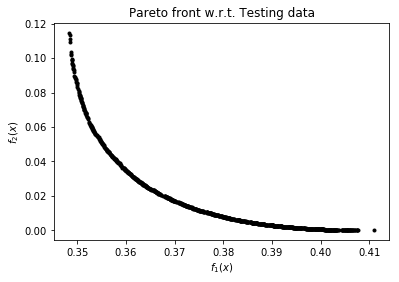

In [11]:
## if necessary, remove extreme points that are far away from Pareto front
def remove_pts(list_f1, list_f2, list_pts, num):
    list_f1_idx = np.argsort(list_f1)[:-num]
    return list_f1[list_f1_idx], list_f2[list_f1_idx], list_pts[list_f1_idx]
# f1_arrays7, f2_arrays7, point_arrays7 = remove_pts(f1_arrays7, f2_arrays7, point_arrays7, 1)
plt.plot(f1_arrays7, f2_arrays7, 'k.')
plt.xlabel('$f_1(x)$')
plt.ylabel('$f_2(x)$')
plt.title('Pareto front w.r.t. Testing data')
plt.show()

### Plot the full trade-off information
- pick a certain number of points from Pareto front, evaluate accuracy, disparte impact, TPR, FPR, etc. 
- Take several minutes to process 1500 points

In [12]:
M = min(1500, len(f1_arrays7)) 
CV_Score, percentage, pvalue, total_accuracy, training_accuracy, training_FPR, training_FNR, \
training_loss, training_obj1, training_obj2 \
= prob.compute_accuracy(f1_arrays7, f2_arrays7, point_arrays7, M)


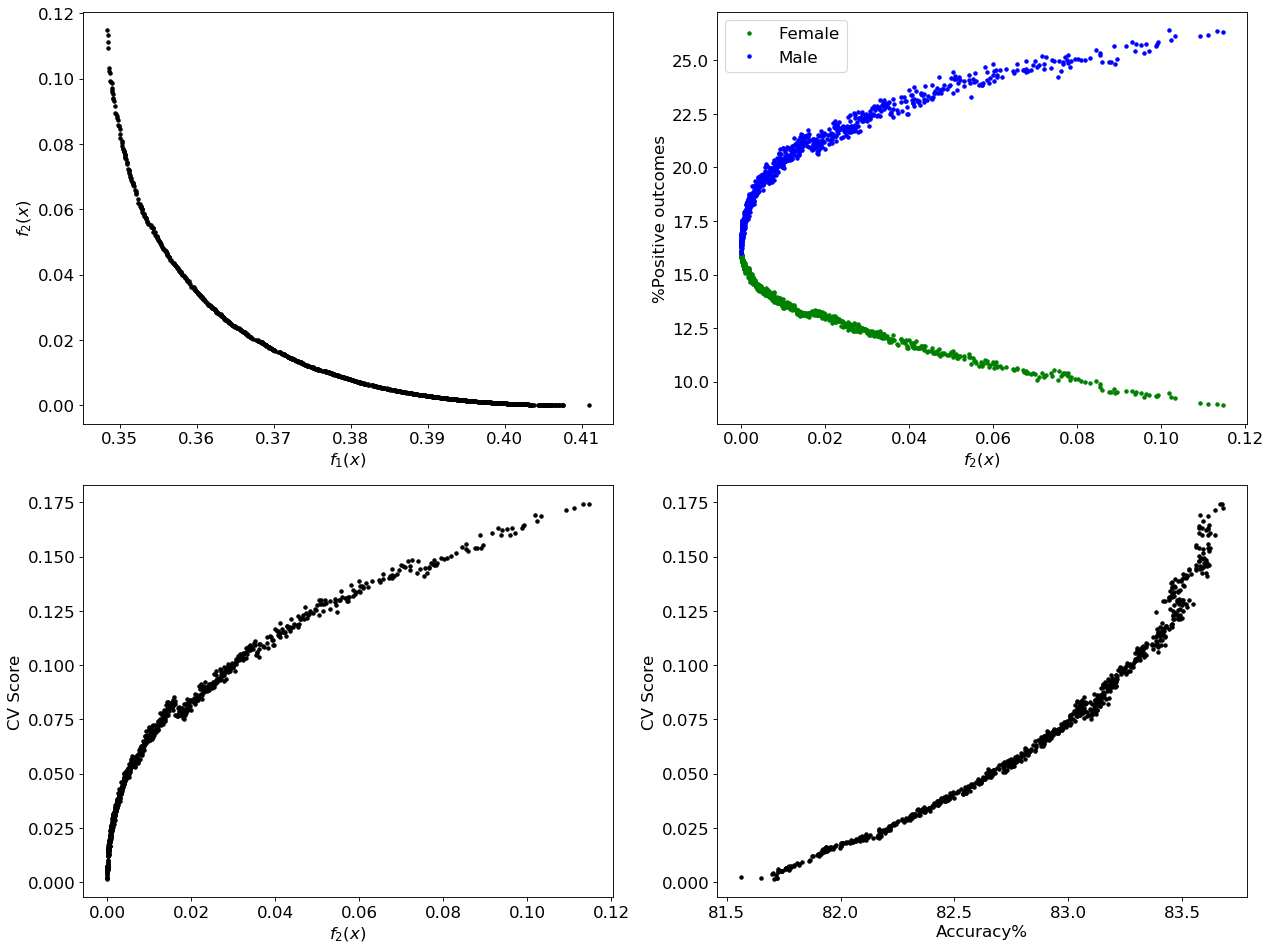

In [13]:
fig = plt.figure(figsize=(16, 12), dpi= 80, facecolor='w', edgecolor='k')
ax1 = plt.subplot(2, 2, 1)
ax1.xaxis.set_tick_params(labelsize=15)
ax1.yaxis.set_tick_params(labelsize=15)
ax1.plot(training_loss, training_obj2, 'k.', lw=2)
ax1.set_xlabel('$f_1(x)$', fontsize = 15)
ax1.set_ylabel('$f_2(x)$', fontsize = 15)

ax2 = plt.subplot(2, 2, 2)
ax2.xaxis.set_tick_params(labelsize=15)
ax2.yaxis.set_tick_params(labelsize=15)
ax2.plot(training_obj2, percentage[:, 0]*100.0, 'g.', lw=2, label = 'Female')
ax2.plot(training_obj2, percentage[:, 1]*100.0, 'b.', lw=2, label = 'Male')
ax2.set_xlabel('$f_2(x)$', fontsize = 15)
ax2.set_ylabel('%Positive outcomes', fontsize = 15)
ax2.legend(fontsize=15)

ax3= plt.subplot(2, 2, 3)
ax3.xaxis.set_tick_params(labelsize=15)
ax3.yaxis.set_tick_params(labelsize=15)
ax3.plot(training_obj2, CV_Score, 'k.', lw=2)
ax3.set_xlabel('$f_2(x)$', fontsize=15)
ax3.set_ylabel('CV Score', fontsize=15)

ax4 = plt.subplot(2, 2, 4)
ax4.xaxis.set_tick_params(labelsize=15)
ax4.yaxis.set_tick_params(labelsize=15)
ax4.plot(total_accuracy*100.0, CV_Score, 'k.', lw=2)
ax4.set_xlabel('Accuracy%', fontsize=15)
ax4.set_ylabel('CV Score', fontsize=15)

plt.tight_layout()
plt.show()



# Handle Accuracy vs Disparate Impact In Multi-valued case

Deal with the case of Multi-valued sensitive attribute--Race using Adult income dataset.

**Dataset:**
- Use the same dataset as before.
- For convenience, we provided dataset in the txt file `data/Adult_income_race_reduced_smg.txt`.
- Note that the race attribute is pre-processed via one-hot encoding technique.

**Bi-objective problem:** Decision variables are $x = (c, b)$
- First objective: minimize regularized logistic regression. 
    - $\min~ f_1(c, b) \;=\; \tfrac{1}{N}\sum_{j=1}^N \text{log}(1+\text{exp}(-y_j(c^\top z_j + b)))$
- Second objective: minimize disparate impact (approximated by maximum covariance among multiple sensitive attributes). 
    - $\min~ f_3^\text{DI}(c, b) = \max_{i = 1, \ldots, K} \left(\frac{1}{N}\sum_{j=1}^N(a^i_j - \bar{a}^i)(c^\top z_j + b)\right)^2$

Please refer to our paper **Accuracy and Fairness Trade-offs in Machine Learning: AStochastic Multi-Objective Approach** for more details. 


In [9]:
data_idx = 8
prob = func.Fairness_LogRe_DI_multi('data/Adult_income_race_reduced_smg.txt', 'Adult_income_race', \
                                    list(range(50, 55)), SEED_arr[data_idx], num_data[data_idx], 'train')
run = pfsmg.Main_SMG(prob)

run.max_len_pareto_front = 1500
run.max_iter = 1000

## key parameters
run.point_per_iteration = 3
run.num_steps_per_point = 2
run.stepsize = 2.6 
run.step_scheme = 3
run.alpha = 1.0/3
run.discount_iter_interval = 100

run.batch1_init = 80
run.batch1_factor = 1.003 
run.batch1_max = 1
run.batch2_init = 80 
run.batch2_factor = 1.003 
run.batch2_max = 1 

## other parameters
run.num_starting_pts = 5 
run.percent_explore = 0.4
run.f1_explore_interval = 10 
run.f2_explore_interval = 40 

run.f1_explore_pt_per_iter = 2 
run.f2_explore_pt_per_iter = 1 
run.f1_num_steps_per_point = 2*run.num_steps_per_point 
run.f2_num_steps_per_point = run.num_steps_per_point

run.num_max_hole_points = 10
run.max_hole_explore_pt_per_iter = 2*run.point_per_iteration
run.max_hole_num_steps_per_point = run.num_steps_per_point
run.max_hole_only = False
run.dense_threshold = 0 # 0 means 1.0/(self.num_iter/2 + 1000)

#Training data size:  5000
Sensitive feature index:  [50, 51, 52, 53, 54]
Mean of sensitive values:  [0.008  0.0288 0.0944 0.0058 0.863 ]


### The following PF-SMG function is designed to iteratively update fronts
- The algorithm may takes more than hours to terminate. Will add parallel implementation in our next version.
- The algorithm will be terminated either max iteration is reached or max number of non-dominated points is obtained. Reduce `run.max_iter` to reduce running time and increase `run.max_len_pareto_front` to improve Pareto front spread. 

In [10]:
f1_arrays7, f2_arrays7, point_arrays7, total_time_smg = run.main_SMG()

time:  0.20248103141784668
#Pts:  2  #Iter:  2
time:  0.0722041130065918
#Pts:  5  #Iter:  4
time:  0.14900588989257812
#Pts:  15  #Iter:  6
time:  0.4194912910461426
#Pts:  21  #Iter:  8
time:  0.5018577575683594
#Pts:  19  #Iter:  10
time:  0.6099917888641357
#Pts:  20  #Iter:  12
time:  0.5523970127105713
#Pts:  29  #Iter:  14
time:  0.7200567722320557
#Pts:  45  #Iter:  16
time:  0.8892269134521484
#Pts:  44  #Iter:  18
time:  0.9557287693023682
#Pts:  67  #Iter:  20
time:  1.7266008853912354
#Pts:  60  #Iter:  22
time:  1.2356269359588623
#Pts:  67  #Iter:  24
time:  1.340590238571167
#Pts:  64  #Iter:  26
time:  1.240753173828125
#Pts:  79  #Iter:  28
time:  1.526763916015625
#Pts:  76  #Iter:  30
time:  1.9787578582763672
#Pts:  69  #Iter:  32
time:  1.4146900177001953
#Pts:  70  #Iter:  34
time:  1.3858370780944824
#Pts:  81  #Iter:  36
time:  1.6565098762512207
#Pts:  88  #Iter:  38
time:  1.8442659378051758
#Pts:  77  #Iter:  40
time:  2.488112211227417
#Pts:  86  #Iter:  42


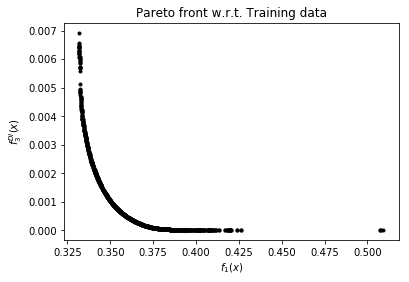

In [18]:
plt.plot(f1_arrays7, f2_arrays7, 'k.')
plt.xlabel('$f_1(x)$')
plt.ylabel('$f_3^{DI}(x)$')
plt.title('Pareto front w.r.t. Training data')
plt.show()

In [ ]:
## Dump resulting Pareto front into pickle if you want
logfile = "pickle/race_vs_loss/Race_seed%s_num_data%s.pickle"\
          %(SEED_arr[data_idx], num_data[data_idx])
with open(logfile, 'wb') as handle:
    pickle.dump([prob.data_name, total_time_smg, run.num_grad_eval_f1, \
             run.num_grad_eval_f2, run.num_iter, f1_arrays7, \
             f2_arrays7, point_arrays7], handle)

In [16]:
## Load resulting Pareto front from previous pickle
logfile = "pickle/race_vs_loss/Race_seed%s_num_data%s.pickle"\
          %(SEED_arr[data_idx], num_data[data_idx]) 
with open(logfile, 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    data, total_time_smg, num_grad_eval_f1, num_grad_eval_f2, num_iter7, f1_arrays7, \
    f2_arrays7, point_arrays7 = u.load()
    print(total_time_smg) 

17174.419123888016


### Evaluate Pareto front using testing data 

In [19]:
prob = func.Fairness_LogRe_DI_multi('data/Adult_income_race_reduced_smg.txt', 'Adult_income_race', \
                                    list(range(50, 55)), SEED_arr[data_idx], num_data[data_idx], 'test')
run = pfsmg.Main_SMG(prob)

# clean dominated points according to testing data
f1_arrays7 = prob.loss(point_arrays7)
f2_arrays7 = prob.f2(point_arrays7)
f1_arrays7, f2_arrays7, point_arrays7 = run.clear(f1_arrays7, f2_arrays7, point_arrays7)
print("# Pareto points after cleanning up: ", len(f1_arrays7))

# Testing data size:  40222
Sensitive feature index:  [50, 51, 52, 53, 54]
Mean of sensitive values:  [0.0098205  0.02881508 0.09338173 0.00805529 0.8599274 ]
# Pareto points after cleanning up:  161


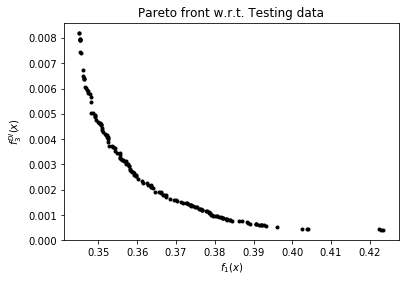

In [20]:
plt.plot(f1_arrays7, f2_arrays7, 'k.')
plt.xlabel('$f_1(x)$')
plt.ylabel('$f_3^{DI}(x)$')
plt.title('Pareto front w.r.t. Testing data')
plt.show()

### Plot the full trade-off information
- pick a certain number of points from Pareto front, evaluate accuracy, disparte impact, TPR, FPR, etc. 

In [21]:
M = min(1500, len(f1_arrays7))
CV_Score, percentage, pvalue, total_accuracy, training_accuracy, training_FPR, training_FNR, \
training_loss, training_obj1, training_obj2 \
= prob.compute_accuracy(f1_arrays7, f2_arrays7, point_arrays7, M)


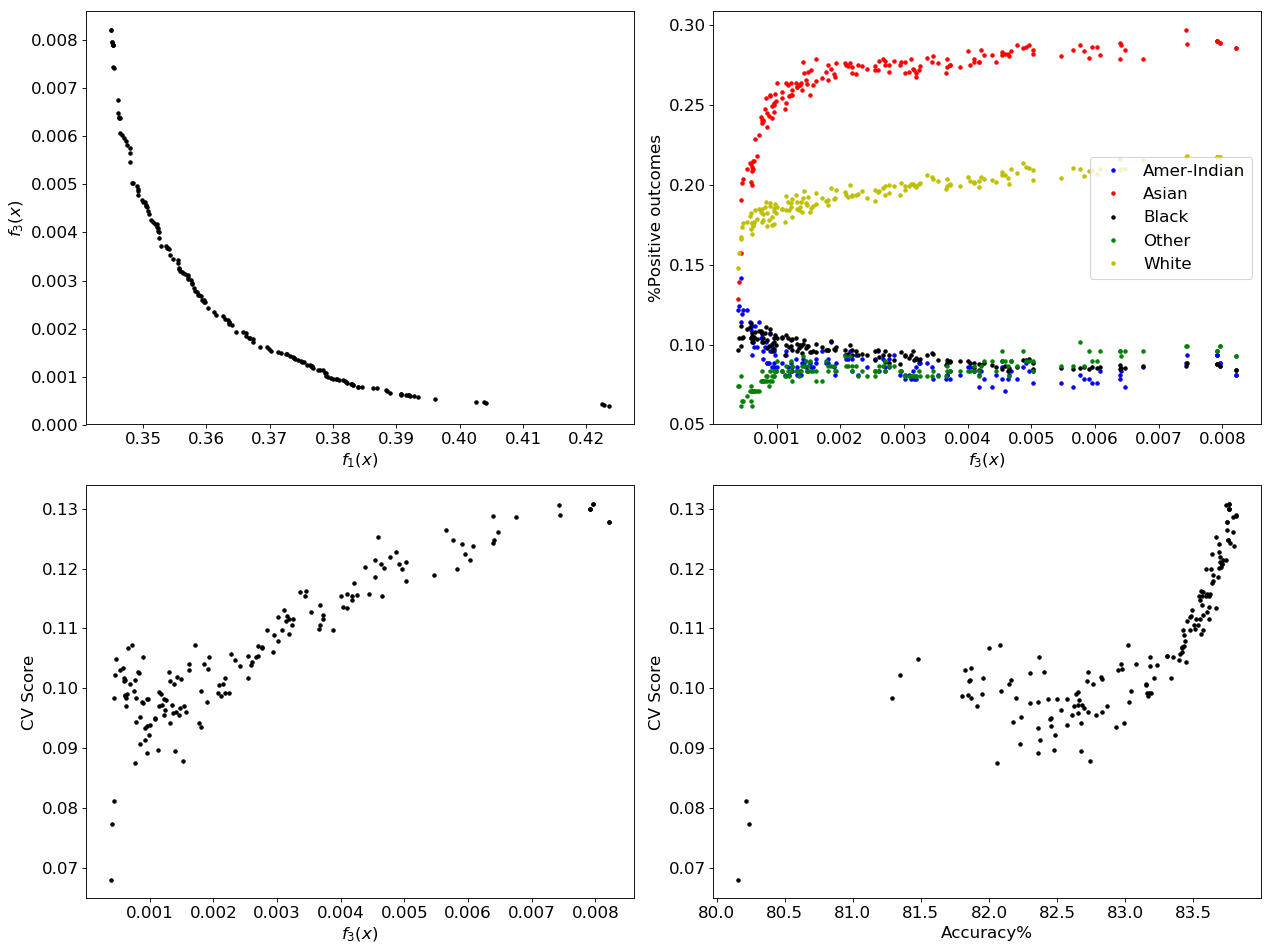

In [22]:
fig = plt.figure(figsize=(16, 12), dpi= 80, facecolor='w', edgecolor='k')
ax1 = plt.subplot(2, 2, 1)
ax1.xaxis.set_tick_params(labelsize=15)
ax1.yaxis.set_tick_params(labelsize=15)
ax1.plot(training_loss, training_obj2, 'k.', lw=2)
ax1.set_xlabel('$f_1(x)$', fontsize = 15)
ax1.set_ylabel('$f_3(x)$', fontsize = 15)

ax2 = plt.subplot(2, 2, 2)
ax2.xaxis.set_tick_params(labelsize=15)
ax2.yaxis.set_tick_params(labelsize=15)
ax2.plot(training_obj2, percentage[:, 0],'b.', lw=4, label = 'Amer-Indian')
ax2.plot(training_obj2, percentage[:, 1],'r.', lw=4, label = 'Asian')
ax2.plot(training_obj2, percentage[:, 2],'k.', lw=4, label = 'Black')
ax2.plot(training_obj2, percentage[:, 3],'g.', lw=4, label = 'Other')
ax2.plot(training_obj2, percentage[:, 4],'y.', lw=4, label = 'White')
ax2.set_xlabel('$f_3(x)$', fontsize = 15)
ax2.set_ylabel('%Positive outcomes', fontsize = 15)
ax2.legend(fontsize = 15)

ax3= plt.subplot(2, 2, 3)
ax3.xaxis.set_tick_params(labelsize=15)
ax3.yaxis.set_tick_params(labelsize=15)
ax3.plot(training_obj2, CV_Score, 'k.', lw=2)
ax3.set_xlabel('$f_3(x)$', fontsize=15)
ax3.set_ylabel('CV Score', fontsize=15)

ax4 = plt.subplot(2, 2, 4)
ax4.xaxis.set_tick_params(labelsize=15)
ax4.yaxis.set_tick_params(labelsize=15)
ax4.plot(total_accuracy*100.0, CV_Score, 'k.', lw=2)
ax4.set_xlabel('Accuracy%', fontsize=15)
ax4.set_ylabel('CV Score', fontsize=15)

plt.tight_layout()
plt.show()


# Handle Three Objectives Simultaneously: Accuracy vs Disparate Impact In binary case vs Disparate Impact In Multi-valued case

Deal with binary sensitive attribute and multi-valued sensitive attribute--Gender and Race using Adult income dataset.

**Dataset:**
- Use the same dataset as before.
- For convenience, we provided processed dataset in the txt file `data/Adult_income_race&gender_reduced_smg.txt`.

**Bi-objective problem:** Decision variables are $x = (c, b)$
- First objective: minimize regularized logistic regression. 
    - $\min~ f_1(c, b) \;=\; \tfrac{1}{N}\sum_{j=1}^N \text{log}(1+\text{exp}(-y_j(c^\top z_j + b)))$
- Second objective: minimize disparate impact (approximated by covariance metrics). 
    - $\min~ f_2^\text{DI}(c, b) \;=\; \left(\frac{1}{N}\sum_{j=1}^N (a_j - \bar{a})(c^\top z_j + b)\right)^2$
- Third objective: minimize disparate impact (approximated by maximum covariance among $K$ sensitive attributes). 
    - $\min~ f_3^\text{DI}(c, b) = \max_{i = 1, \ldots, K} \left(\frac{1}{N}\sum_{j=1}^N(a^i_j - \bar{a}^i)(c^\top z_j + b)\right)^2$


Please refer to **Section 6.1** in our paper **Accuracy and Fairness Trade-offs in Machine Learning: AStochastic Multi-Objective Approach** for more details. 


In [5]:
data_idx = 8
prob = func.Fairness_LogRe_DI_multi_attributes('data/Adult_income_race&gender_reduced_smg.txt', \
                                               'Adult_income_race', list(range(50, 55)), [55], \
                                               SEED_arr[data_idx], num_data[data_idx], 'train')
run = pfsmg.Main_SMG_m3(prob)

run.max_len_pareto_front = 3000
run.max_iter = 1000

## key parameters
run.point_per_iteration = 3
run.num_steps_per_point = 2
run.stepsize = 2.6 
run.step_scheme = 3
run.alpha = 1.0/3
run.discount_iter_interval = 100

run.batch1_init = 80
run.batch1_factor = 1.005
run.batch1_max = 1
run.batch2_init = 80 
run.batch2_factor = 1.005
run.batch2_max = 1.0/2 
run.batch3_init = 80 
run.batch3_factor = 1.005
run.batch3_max = 1.0/2 

## other parameters
run.num_starting_pts = 5
run.percent_explore = 0.4
run.f1_explore_interval = 10 
run.f2_explore_interval = 40 
run.f3_explore_interval = 50

run.f1_explore_pt_per_iter = 2 
run.f2_explore_pt_per_iter = 1 
run.f3_explore_pt_per_iter = 1 

run.f1_num_steps_per_point = 2*run.num_steps_per_point 
run.f2_num_steps_per_point = run.num_steps_per_point
run.f3_num_steps_per_point = run.num_steps_per_point

run.num_max_hole_points = 10
run.max_hole_explore_pt_per_iter = 2*run.point_per_iteration
run.max_hole_num_steps_per_point = run.num_steps_per_point
run.max_hole_only = False
run.dense_threshold = 1.0/1800 # 0 indicates 1.0/(self.num_iter/2 + 1000)

#Training data size:  5000
Sensitive feature index:  [50, 51, 52, 53, 54, 55]
Mean of sensitive values for 1st attribute:  [0.008  0.0288 0.0944 0.0058 0.863 ]
Mean of sensitive values for 2nd attribute:  0.6772


### The following PF-SMG function is designed to iteratively update fronts
- The algorithm may takes more than 1.5 hour to terminate

In [6]:
f1_arrays7, f2_arrays7, f3_arrays7, point_arrays7, total_time_smg = run.main_SMG()

time:  0.27864885330200195
#Pts:  8  #Iter:  2
time:  0.31070399284362793
#Pts:  19  #Iter:  4
time:  0.7384772300720215
#Pts:  61  #Iter:  6
time:  1.6280741691589355
#Pts:  112  #Iter:  8
time:  2.6058781147003174
#Pts:  163  #Iter:  10
Total time:  5.562675952911377


In [ ]:
## Dump resulting Pareto front into pickle if you want
logfile = "pickle/three_obj/Race&gender_seed%s_num_data%s.pickle"\
          %(SEED_arr[data_idx], num_data[data_idx])
with open(logfile, 'wb') as handle:
    pickle.dump([prob.data_name, total_time_smg, run.num_grad_eval_f1, \
             run.num_grad_eval_f2, run.num_grad_eval_f3, run.num_iter, f1_arrays7, \
             f2_arrays7, f3_arrays7, point_arrays7], handle)

In [33]:
## Load resulting Pareto front from previous pickle
logfile = "pickle/three_obj/Race&gender_seed%s_num_data%s.pickle"\
          %(SEED_arr[data_idx], num_data[data_idx])
with open(logfile, 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    prob.data_name, total_time_smg, num_grad_eval_f1, num_grad_eval_f2, num_grad_eval_f3, \
    num_iter, f1_arrays7, f2_arrays7, f3_arrays7, point_arrays7 = u.load()
    print(total_time_smg) 

6928.7115569114685


In [37]:
## remove a certain number of tail points from the 3D Pareto front
def remove_pts(list_f1, list_f2, list_f3, list_pts, num):
    list_f1_idx = np.argsort(list_f1)[:-num]
    return list_f1[list_f1_idx], list_f2[list_f1_idx], list_f3[list_f1_idx], list_pts[list_f1_idx]
f1_arrays7, f2_arrays7, f3_arrays7, point_arrays7 = remove_pts(f1_arrays7, f2_arrays7, f3_arrays7, point_arrays7, 20)

## Visualized 3D trade-offs using training data

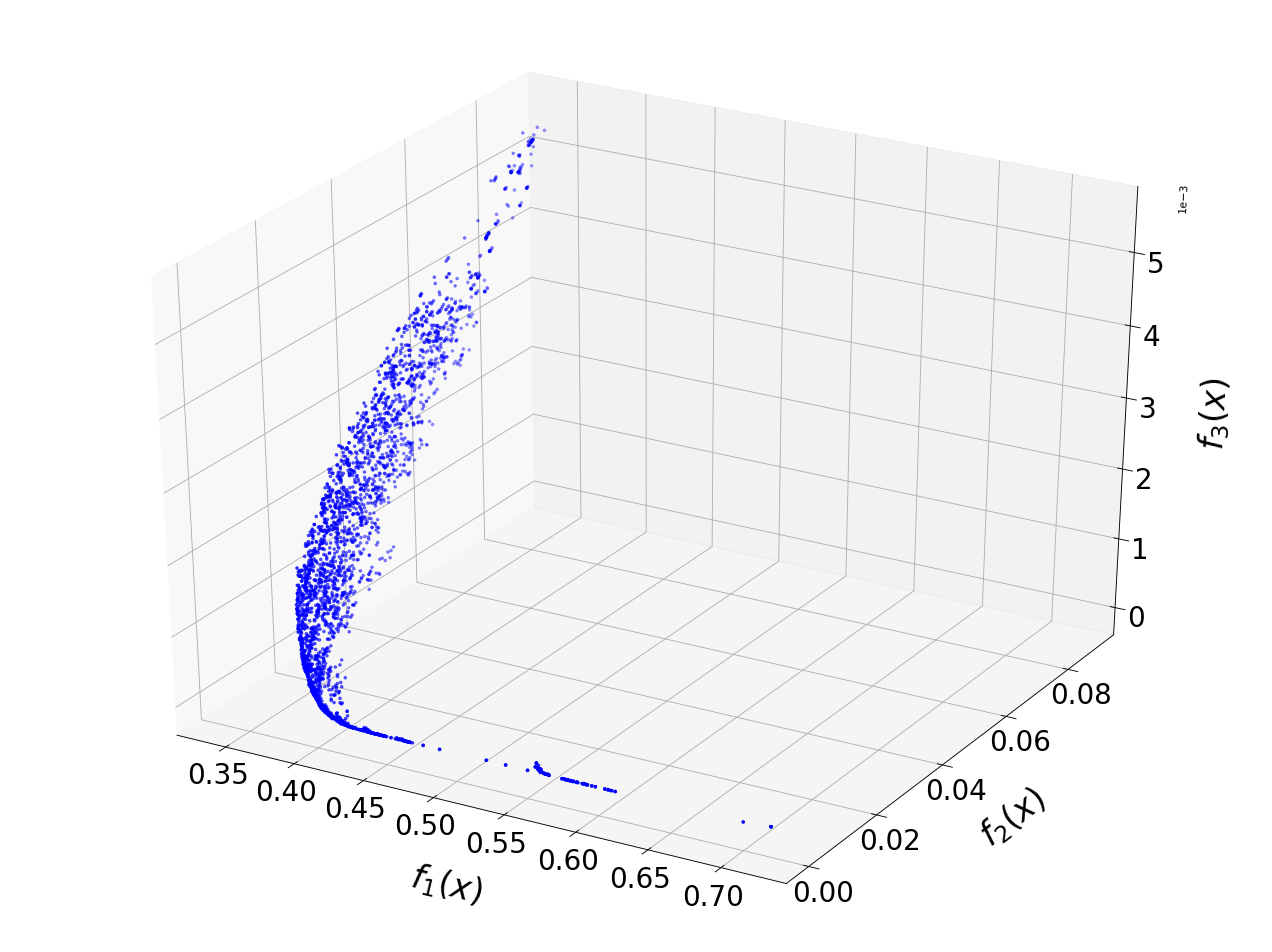

In [38]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16, 12), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection='3d')

ax.xaxis.set_tick_params(labelsize=25)
ax.yaxis.set_tick_params(labelsize=25)
ax.zaxis.set_tick_params(labelsize=25)

ax.set_xlabel('\n$f_1(x)$', fontsize = 30, linespacing=3)
ax.set_ylabel('\n$f_2(x)$', fontsize = 30, linespacing=3)
ax.set_zlabel('\n$f_3(x)$', fontsize = 30, linespacing=3)
plt.ticklabel_format(style='sci', axis='z', scilimits=(0,0))

ax.scatter(f1_arrays7, f3_arrays7, f2_arrays7, c='b', marker='.')

plt.tight_layout()
plt.show()

## save figures
# figure_path = "figs/Adult_threeObj_gender_race.pdf"
# fig.savefig(figure_path, bbox_inches='tight')

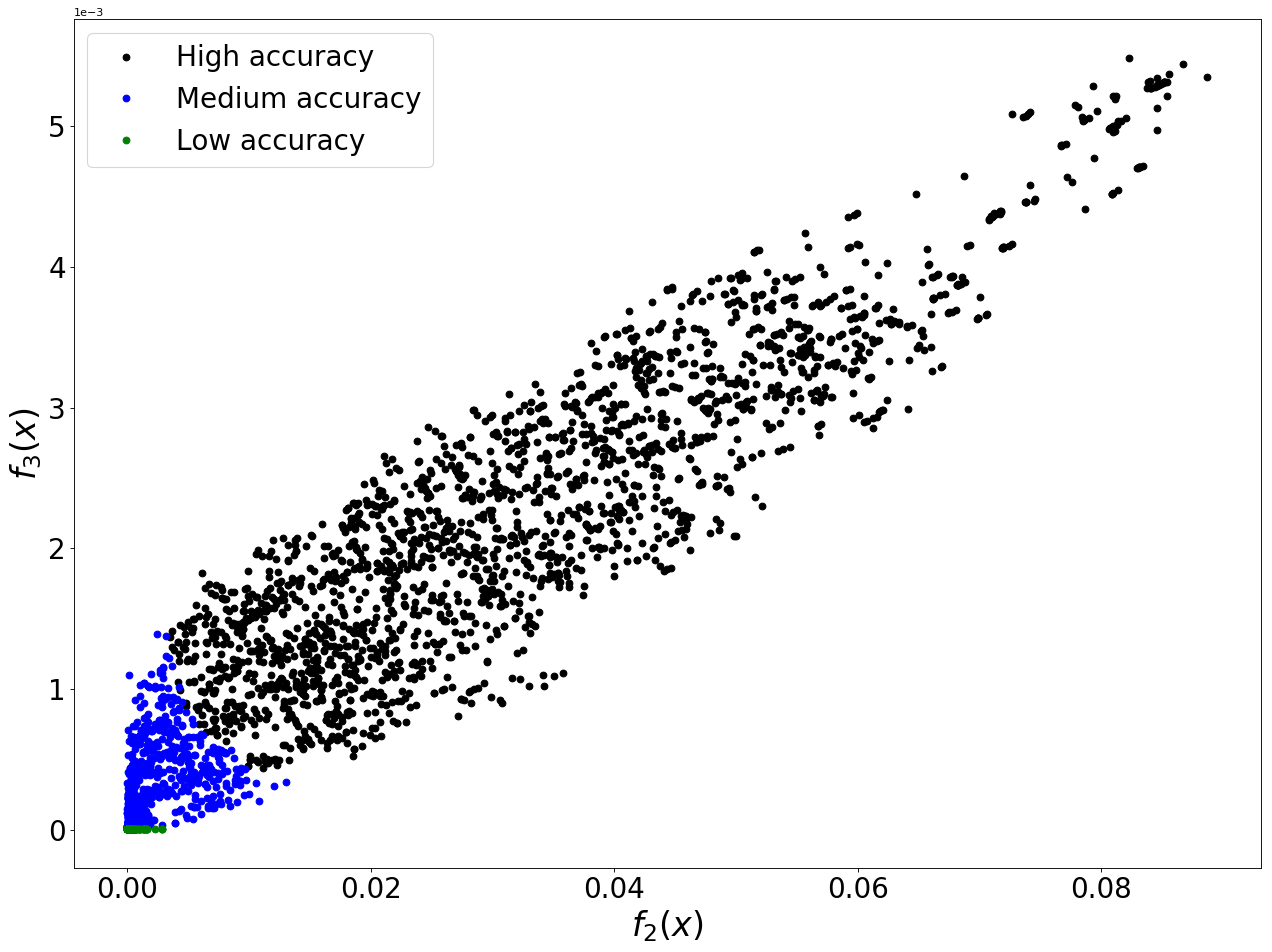

In [39]:
idx_red = np.where(f1_arrays7 < (np.max(f1_arrays7) - np.min(f1_arrays7))*1.0/10 + np.min(f1_arrays7))
idx_blue = np.where((f1_arrays7 >= (np.max(f1_arrays7) - np.min(f1_arrays7))*1.0/10 + np.min(f1_arrays7)) \
                    & (f1_arrays7 < (np.max(f1_arrays7) - np.min(f1_arrays7))*3.5/10 + np.min(f1_arrays7)))
idx_green = np.where(f1_arrays7 >= (np.max(f1_arrays7) - np.min(f1_arrays7))*3.5/10 + np.min(f1_arrays7))


fig = plt.figure(figsize=(16, 12), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(1, 1, 1)
ax.xaxis.set_tick_params(labelsize=25)
ax.yaxis.set_tick_params(labelsize=25)
ax.plot(f3_arrays7[idx_red], f2_arrays7[idx_red],  'k.', label = 'High accuracy', markersize=12) #color=colors   higher accuracy
ax.plot(f3_arrays7[idx_blue], f2_arrays7[idx_blue],  'b.', label = 'Medium accuracy', markersize=12) #color=colors  middle accuracy
ax.plot(f3_arrays7[idx_green], f2_arrays7[idx_green],  'g.', label = 'Low accuracy', markersize=12) #color=colors lowest accuracy

ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.set_xlabel('$f_2(x)$', fontsize=30)
ax.set_ylabel('$f_3(x)$', fontsize=30)
ax.legend(fontsize = 25)


plt.tight_layout()
plt.show()

# figure_path = "figs/Adult_threeObj_gender_race_2.pdf"
# fig.savefig(figure_path, bbox_inches='tight')